In [2]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima_model import ARMAResults
import matplotlib.pyplot as plt

def convert(dataframe):
    l = []
    for i in dataframe:
        c = str(i).split("..")
        f = ""
        if(c[0][0] == "."):
            f += c[0][1:]
        else:
            f += c[0]
        if(len(c)>1):
            f+="."+c[1][:-1]
        l.append(float(f))
    return l

data = pd.read_csv("/home/nishant/Downloads/merge_oil (1).csv")
data = data.iloc[::-1]
data.index = pd.to_datetime(data["Date"],format="%Y-%m-%d")
data = data.drop(['Date'],axis=1)

#splitting the series into training and testing
split = int(0.8 * len(data))
training_data = data[:split]
test_data = data[split:]

In [3]:


print(adfuller(training_data["Price"])[1])
print(adfuller(training_data["IOC_Open"])[1])
print(adfuller(training_data["IOC_High"])[1])
print(adfuller(training_data["IOC_Low"])[1])
print(adfuller(training_data["IOC_Close"])[1])
#print(training_data["IOC_Close"].plot())

diff_ioc_open = training_data["IOC_Open"].diff()[1:]
diff_ioc_high = training_data["IOC_High"].diff()[1:]
diff_ioc_low = training_data["IOC_Low"].diff()[1:]
diff_ioc_close = training_data["IOC_Close"].diff()[1:]



print(adfuller(training_data["ONGC_Open"])[1])
print(adfuller(training_data["ONGC_High"])[1])
print(adfuller(training_data["ONGC_Low"])[1])
print(adfuller(training_data["ONGC_Close"])[1])
#print(training_data["ONGC_Close"].plot())

diff_price = training_data["Price"].diff()[1:]

diff_ongc_open = training_data["ONGC_Open"].diff()[1:]
diff_ongc_high = training_data["ONGC_High"].diff()[1:]
diff_ongc_low = training_data["ONGC_Low"].diff()[1:]
diff_ongc_close = training_data["ONGC_Close"].diff()[1:]


print(adfuller(training_data["TCI_Open"])[1])
print(adfuller(training_data["TCI_High"])[1])
print(adfuller(training_data["TCI_Low"])[1])
print(adfuller(training_data["TCI_Close"])[1])
#print(training_data["TCI_Close"].plot())

diff_tci_open = training_data["TCI_Open"].diff()[1:]
diff_tci_high = training_data["TCI_High"].diff()[1:]
diff_tci_low = training_data["TCI_Low"].diff()[1:]
diff_tci_close = training_data["TCI_Close"].diff()[1:]



print(adfuller(diff_ioc_open)[1])
print(adfuller(diff_ioc_high)[1])
print(adfuller(diff_ioc_low)[1])
print(adfuller(diff_ioc_close)[1])
#print(diff_ioc_close.plot())

print(adfuller(diff_ongc_open)[1])
print(adfuller(diff_ongc_high)[1])
print(adfuller(diff_ongc_low)[1])
print(adfuller(diff_ongc_close)[1])
#print(diff_ongc_close.plot())

print(adfuller(diff_tci_open)[1])
print(adfuller(diff_tci_high)[1])
print(adfuller(diff_tci_low)[1])
print(adfuller(diff_tci_close)[1])
#print(diff_tci_close.plot()) 








'''
IOC_Open
0.8002719134424383
IOC_High
0.7929649906307306
IOC_Low
0.8029500063118031
IOC_Close
0.8039473147230245
ONGC_Open
0.2742350667014256
ONGC_High
0.2469060046476632
ONGC_Low
0.28255038008874644
ONGC_Close
0.2690677416186882
TCI_Open
0.6197477341099538
TCI_High
0.5681508146555672
TCI_Low
0.6252814709902863
TCI_Close
0.6522010507098521
'''


0.7045981675734824
0.9990410289044603
0.9986904991334106
0.9986961848979752
0.9988699031482736
0.3783545786701888
0.3495948423989612
0.3741751132910967
0.4057938385530423
0.5614986355311959
0.5518971449077584
0.6026590896103907
0.6280993689484832
3.0931979084324334e-15
0.0
3.9676269271623017e-22
0.0
6.907525780730542e-14
0.0
0.0
0.0
5.6951097480746595e-18
0.0
0.0
0.0


'\nIOC_Open\n0.8002719134424383\nIOC_High\n0.7929649906307306\nIOC_Low\n0.8029500063118031\nIOC_Close\n0.8039473147230245\nONGC_Open\n0.2742350667014256\nONGC_High\n0.2469060046476632\nONGC_Low\n0.28255038008874644\nONGC_Close\n0.2690677416186882\nTCI_Open\n0.6197477341099538\nTCI_High\n0.5681508146555672\nTCI_Low\n0.6252814709902863\nTCI_Close\n0.6522010507098521\n'

In [4]:
ex_ongc = pd.concat([diff_ongc_open,diff_ongc_high,diff_ongc_low,diff_price],axis=1)
print(ex_ongc)
ex_tci = pd.concat([diff_tci_open,diff_tci_high,diff_tci_low,diff_price],axis=1)
print(ex_tci)
ex_ioc = pd.concat([diff_ioc_open,diff_ioc_high,diff_ioc_low,diff_price],axis=1)
print(ex_ioc)

            ONGC_Open  ONGC_High   ONGC_Low  Price
Date                                              
2011-12-13  -3.932999  -5.033005  -1.965989  139.0
2011-12-14  -1.199997  -0.867004  -1.034011 -133.0
2011-12-15  -3.000000  -2.165986  -2.000000 -173.0
2011-12-16   0.732987   3.799988  -1.232987 -133.0
2011-12-19  -0.532990  -6.099991  -0.932999   80.0
2011-12-20   0.733002   3.099991   2.665986  170.0
2011-12-21   3.067001   5.066010   3.267013   61.0
2011-12-22   0.000000   1.833999   1.567001   54.0
2011-12-23   7.332993   1.132996   2.500000   32.0
2011-12-27  -2.932999  -2.000000   0.299988   74.0
2011-12-28   0.132996  -0.399994  -0.333999  -49.0
2011-12-29  -0.932999  -0.367004  -2.332993  -21.0
2011-12-30  -3.134002  -0.033005  -0.800003   13.0
2012-01-03   2.934005   1.132996   3.100006  125.0
2012-01-04   1.932999   2.067001   0.966995   20.0
2012-01-05   2.966995   1.567001  -0.067001  -19.0
2012-01-06  -8.033996  -7.699997  -4.899994  -98.0
2012-01-09   1.734008   0.40000

/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


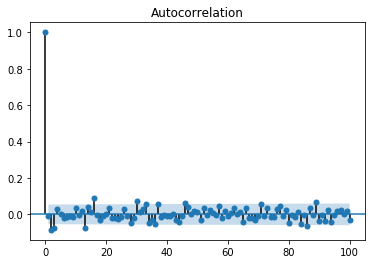

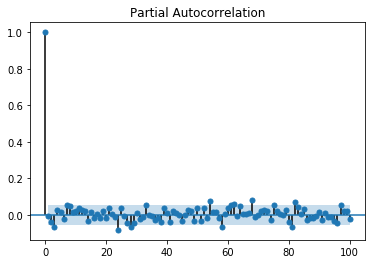

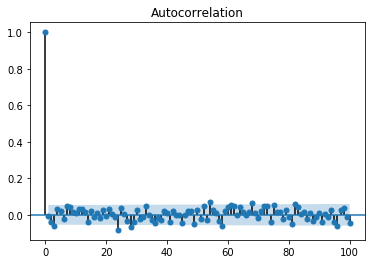

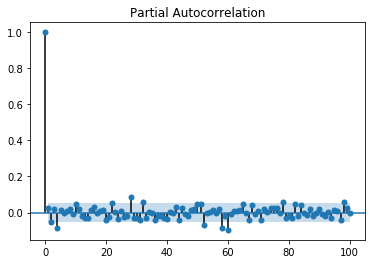

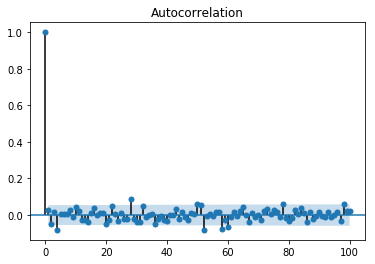

<Figure size 432x288 with 0 Axes>

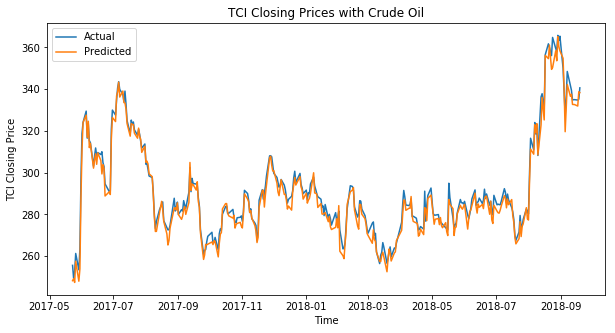

In [7]:
#find p and q for ARMAX

#pacf for p
#a = plot_pacf(diff_ongc_close,lags=100)
#a.savefig("pacfongc.png")

b = plot_acf(diff_ongc_close,lags=100) 
b.savefig("acfongc.png")
#plot_pacf(training_data["ONGC_Close"],lags=50) 
#plot_acf(training_data["ONGC_Close"],lags=50) 

a = plot_pacf(diff_ioc_close,lags=100) 
a.savefig("pacfioc.png")
b = plot_acf(diff_ioc_close,lags=100)
b.savefig("acfioc.png")
#plot_pacf(training_data["IOC_Close"],lags=50) 
#plot_acf(training_data["IOC_Close"],lags=50) 


a = plot_pacf(diff_tci_close,lags=100)
a.savefig("pacftci.png")
b = plot_acf(diff_tci_close,lags=100)
b.savefig("acftci.png")
#plot_pacf(training_data["TCI_Close"],lags=50) 
#plot_acf(training_data["TCI_Close"],lags=50) 


#           FORECAST ONGC

'''for i in range(1,6):
    for j in range(1,6):
        try:
            model = ARIMA(diff_ongc_close,order=(i,0,j),exog=ex_ongc)
            model_fit = model.fit(disp=0)
            print(str(i)+" and "+str(j))
            print(model_fit.aic)
            print(model_fit.bic)
            print("\n")
        except:
            print("Invalid p and q")'''

'''model = ARIMA(diff_ongc_close,order=(3,0,3),exog=ex_ongc)
model_fit = model.fit(disp=0)

test_exog = pd.concat([test_data["ONGC_Open"],test_data["ONGC_High"],test_data["ONGC_Low"],test_data["Price"]],axis=1)

forecast = model_fit.forecast(steps=len(test_data),exog=test_exog)[0]
f = []
for yhat in forecast:
    f.append(yhat)

    
    
#print(history)

rms = sqrt(mean_squared_error(list(test_data["ONGC_Close"]), f))
predicted_ongc = pd.DataFrame({'Predicted':f})
predicted_ongc.index = test_data.index
rms = sqrt(mean_squared_error(list(test_data["ONGC_Close"]), f))
predicted_ongc = pd.DataFrame({'Predicted':f})
predicted_ongc.index = test_data.index
fig = plt.figure()
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(111)
plt.plot(test_data["ONGC_Close"],label='Actual')
plt.plot(predicted_ongc,label='Predicted')
plt.xlabel("Time")
plt.ylabel("ONGC Closing Price")
plt.legend(loc='upper left')
plt.title("ONGC Closing Prices with Crude Oil")
fig.savefig('ONGC3.png')'''

'''for i in range(1,6):
    for j in range(1,6):
        try:
            model = ARIMA(diff_ioc_close,order=(i,0,j),exog=ex_ioc)
            model_fit = model.fit(disp=0)
            print(str(i)+" and "+str(j))
            print(model_fit.aic)
            print(model_fit.bic)
            print("\n")
        except:
            print("Invalid p and q") '''



'''
#           FORECAST IOC
model = ARIMA(diff_ioc_close,order=(3,0,3),exog=ex_ioc)
model_fit = model.fit(disp=0)

test_exog = pd.concat([test_data["IOC_Open"],test_data["IOC_High"],test_data["IOC_Low"],test_data["Price"]],axis=1)

forecast = model_fit.forecast(steps=len(test_data),exog=test_exog)[0]
f = []
for yhat in forecast:
    f.append(yhat)


    
    

rms = sqrt(mean_squared_error(list(test_data["IOC_Close"]), f))
predicted_ioc = pd.DataFrame({'Predicted':f})
predicted_ioc.index = test_data.index
rms = sqrt(mean_squared_error(list(test_data["IOC_Close"]), f))
predicted_ioc = pd.DataFrame({'Predicted':f})
predicted_ioc.index = test_data.index
fig = plt.figure()
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(111)
plt.plot(test_data["IOC_Close"],label='Actual')
plt.plot(predicted_ioc,label='Predicted')
plt.xlabel("Time")
plt.ylabel("IOC Closing Price")
plt.legend(loc='upper left')
plt.title("IOC Closing Prices with Crude Oil")
fig.savefig('IOC3.png')'''

#           FORECAST TCI


'''for i in range(1,6):
    for j in range(1,6):
        try:
            model = ARIMA(diff_tci_close,order=(i,0,j),exog=ex_tci)
            model_fit = model.fit(disp=0)
            print(str(i)+" and "+str(j))
            print(model_fit.aic)
            print(model_fit.bic)
            print("\n")
        except:
            print("Invalid p and q")'''

model = ARIMA(diff_tci_close,order=(4,0,4),exog=ex_tci)
model_fit = model.fit(disp=0)

test_exog = pd.concat([test_data["TCI_Open"],test_data["TCI_High"],test_data["TCI_Low"],test_data["Price"]],axis=1)

forecast = model_fit.forecast(steps=len(test_data),exog=test_exog)[0]
f = []
for yhat in forecast:
    f.append(yhat)


    
    
#print(history)

rms = sqrt(mean_squared_error(list(test_data["TCI_Close"]), f))
predicted_tci = pd.DataFrame({'Predicted':f})
predicted_tci.index = test_data.index
fig = plt.figure()
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(111)
plt.plot(test_data["TCI_Close"],label='Actual')
plt.plot(predicted_tci,label='Predicted')
plt.xlabel("Time")
plt.ylabel("TCI Closing Price")
plt.legend(loc='upper left')
plt.title("TCI Closing Prices with Crude Oil")
fig.savefig('TCI3.png')



#print(list(predicted_ioc["Predicted"]))





In [25]:
#print(rms)
#print(test_data["IOC_Close"].plot())
#print(predicted_ioc.plot())
#print(list(predicted_ioc["Predicted"]))
#print(list(test_data["IOC_Close"]))
#print(list(predicted_tci["Predicted"]))
#print(list(test_data["TCI_Close"]))
print(list(predicted_ongc["Predicted"]))


[174.94957998622613, 173.85371943849185, 173.93000009405017, 176.29516518729355, 173.3807488600956, 176.27662811040062, 175.6250056807139, 172.8778233582222, 173.11708944728645, 177.07625169411136, 171.66005735366423, 172.68472680705645, 169.3156771502886, 168.2433568339282, 168.50002294673283, 167.99349563643915, 168.631044613285, 167.556511655843, 166.39971340341845, 165.02086929326143, 168.21914779069482, 164.67512278960942, 160.86842338352227, 157.82579592222748, 156.92608597640145, 158.02975546931594, 158.3037352943677, 156.84797136119656, 157.3133535930222, 160.4573286136647, 162.0094597932682, 160.52929844625436, 159.50606038609305, 162.11267953590448, 160.6166871297333, 164.39407301156098, 159.34230007078617, 157.91721109808407, 159.18388646526265, 160.34883989214802, 160.92035458465062, 166.0720644634961, 163.79846781867667, 161.89712639159907, 161.7632663706376, 163.28662278917713, 162.14585759639462, 163.13278743238993, 168.4447840114959, 167.05752180581794, 164.283275403751